# Impact of advertisement spend on product Sales

We have to use  linear regression to understand how advertisement spend is impacting sales. 

Data we use is SalesAdvertising.csv<Br>
Column names are
TV	radio	newspaper	sales

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

%matplotlib inline

In [4]:
data = pd.read_csv('data\\SalesAdvertising.csv', index_col=0)

data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## 1. Implement a Simple linear regression 

we first use 2 columns:
a)independent variable ['TV']
b)dependent variable ['sales']

1.1 - First Draw a scatter plot for 
a)independent variable ['TV']
b)dependent variable ['sales']
 

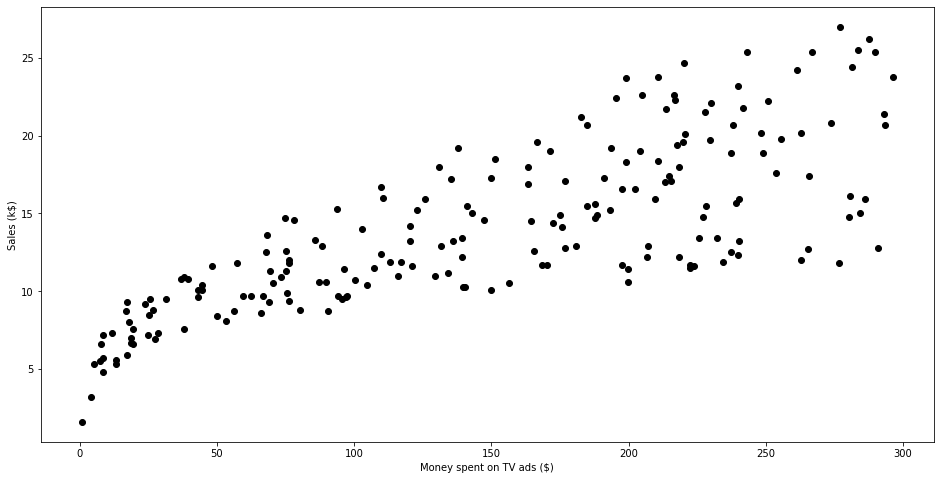

In [5]:
plt.figure(figsize=(16,8))
plt.scatter(data['TV'], data['sales'], c='black')
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales (k$)')
plt.show()

1.2) Build a simple linear regression model using 
a)X=independent variable ['TV']
b)y=dependent variable ['sales']

In [6]:
X = data['TV'].values.reshape(-1, 1)
y = data['sales'].values.reshape(-1, 1)



1.3) Split the data 80:20

In [7]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y,test_size=.2,random_state =15)

1.4) Fit the model

In [8]:
reg = LinearRegression()
reg.fit(xTrain, yTrain)

print(f"The linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV")

The linear model is: 
 Y = 7.0510918738451815 + 0.04758741607859497*TV


1.5) run the predicitons on test data

In [9]:
y_predictions = reg.predict(xTest)

1.6)
-Make a scatter plot of xTest and yTest variables. 
-add a line plot with xTest and y_predictions on the scatter plot


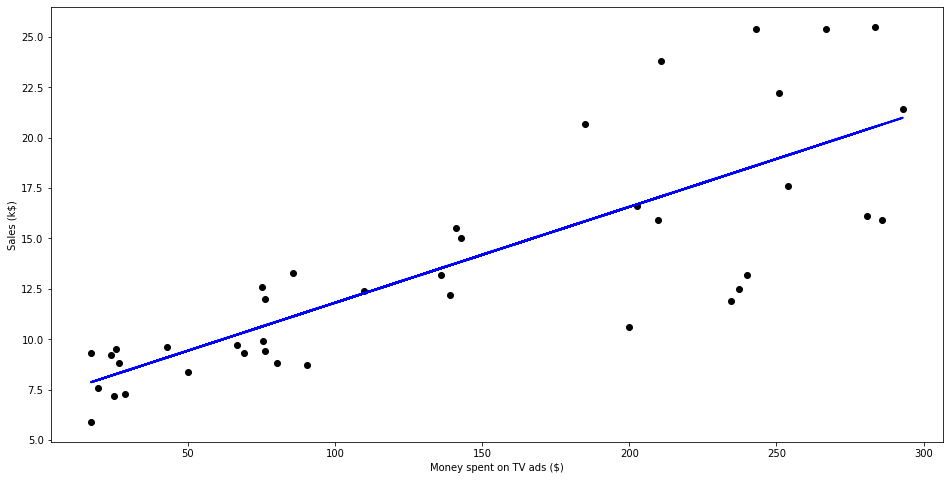

In [10]:


plt.figure(figsize=(16,8))
plt.scatter(xTest, yTest, c='black')

plt.plot(xTest, y_predictions, c='blue', linewidth=2)

plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales (k$)')
plt.show()

1.7)Test the accuracy of the model 

In [11]:
from sklearn.metrics import r2_score

In [12]:
r2_score(yTest,y_predictions, multioutput='uniform_average')

0.6558440204794913

# 2. Implment Multiple linear regression 

2.1) Take all the independent variables and use sales as the dependent variables

In [13]:
Xs = data.drop(['sales'], axis=1)
ys = data['sales'].values.reshape(-1, 1)



2.2) Split the data into 80:20

In [14]:
xmTrain, xmTest, ymTrain, ymTest = train_test_split(Xs,ys,test_size=.2,random_state =15)

2.3)Fit the model

In [19]:
mreg = LinearRegression()
mreg.fit(xmTrain, ymTrain)

print(f"The linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*radio + {reg.coef_[0][2]}*newspaper")

The linear model is: 
 Y = 2.657585917146074 + 0.04681995525137476*TV + 0.18857655931851042*radio + 0.0014503705461097907*newspaper


2.4) run the predicitons on test data

In [20]:
ym_predictions = mreg.predict(xmTest)

2.5)Test the accuracy of the model

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(ymTest,ym_predictions, multioutput='uniform_average')

0.9064939179490465